# ML Capstone 1 - Part 2 E-Commerce Customer Segmentation

 ## TODO
 
 ### Feature Selection
- Selecting relevant features for segmentation and classification based on EDA insights
- Scaling numerical features and encoding categorical variables

### Model Preparation
- Preparing the dataset for clustering algorithms and classification models


### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [32]:
# Step 1: Data Retrieval
df = pd.read_csv(r"C:\Users\gopis\Desktop\DAML\Projects\ML\Week-1\Cleaned_data.csv", encoding="ISO-8859-1")   #to read the data we have to use read_csv(for csv file)
print(df.head())


   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  FinalPrice  \
0  2010-12-01 08:26       2.55     17850.0  UNITED KINGDOM       15.30   
1  2010-12-01 08:26       3.39     17850.0  UNITED KINGDOM       20.34   
2  2010-12-01 08:26       2.75     17850.0  UNITED KINGDOM       22.00   
3  2010-12-01 08:26       3.39     17850.0  UNITED KINGDOM       20.34   
4  2010-12-01 08:26       3.39     17850.0  UNITED KINGDOM       20.34   

   TotalPrice  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34  


In [38]:
df.drop('FinalPrice',axis=1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26,2.55,17850.0,UNITED KINGDOM,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26,3.39,17850.0,UNITED KINGDOM,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26,2.75,17850.0,UNITED KINGDOM,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26,3.39,17850.0,UNITED KINGDOM,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26,3.39,17850.0,UNITED KINGDOM,20.34
...,...,...,...,...,...,...,...,...,...
518932,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50,0.85,12680.0,FRANCE,10.20
518933,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50,2.10,12680.0,FRANCE,12.60
518934,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50,4.15,12680.0,FRANCE,16.60
518935,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50,4.15,12680.0,FRANCE,16.60


In [39]:
df.shape

(518937, 10)

**Customer Segmentation (Clustering):K-Means**

Now,lets take country and totalprice feature to make our clustering 

In [46]:
X=df.iloc[:,[6,8]].values

In [47]:
print(X)

[[1.785e+04 1.530e+01]
 [1.785e+04 2.034e+01]
 [1.785e+04 2.200e+01]
 ...
 [1.268e+04 1.660e+01]
 [1.268e+04 1.660e+01]
 [1.268e+04 1.485e+01]]


In [49]:
#WCSS value

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=30)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    

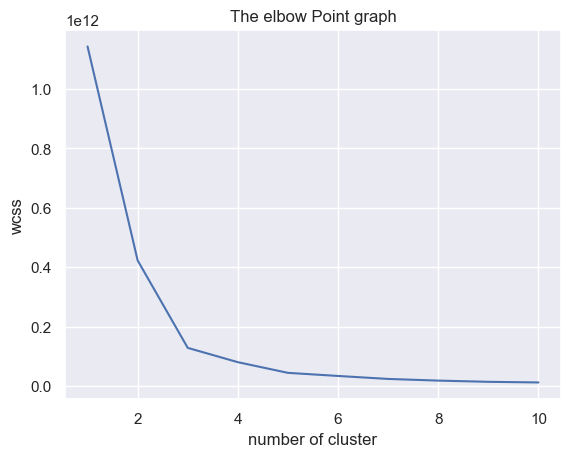

In [51]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The elbow Point graph')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()

the optimal no.of clusters = 5 

Traning k-means

In [61]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=30)
Y=kmeans.fit_predict(X)
print(Y)

[4 4 4 ... 1 1 1]


Visulalize k-means cluster

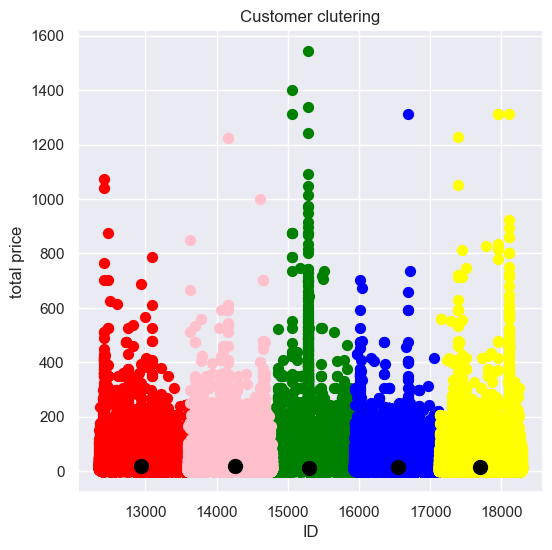

In [62]:
plt.figure(figsize=(6,6))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label="cluster-1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label="cluster-2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label="cluster-3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='pink',label="cluster-4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='yellow',label="cluster-5")

#plot centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.title('Customer clutering')
plt.xlabel('ID')
plt.ylabel('total price')
plt.show()


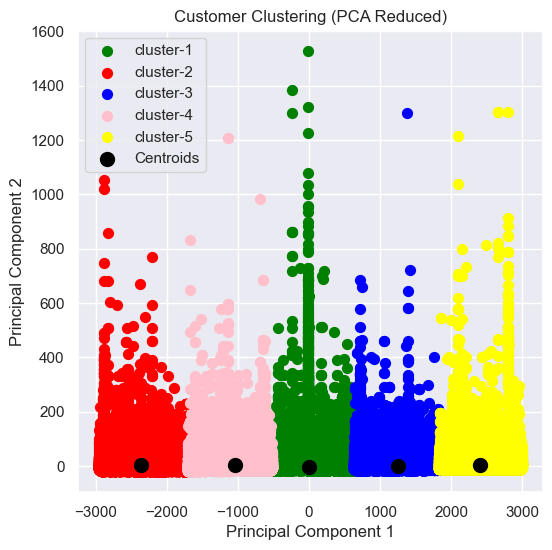

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the clusters with the reduced dimensions
plt.figure(figsize=(6, 6))

plt.scatter(X_pca[Y==0, 0], X_pca[Y==0, 1], s=50, c='green', label="cluster-1")
plt.scatter(X_pca[Y==1, 0], X_pca[Y==1, 1], s=50, c='red', label="cluster-2")
plt.scatter(X_pca[Y==2, 0], X_pca[Y==2, 1], s=50, c='blue', label="cluster-3")
plt.scatter(X_pca[Y==3, 0], X_pca[Y==3, 1], s=50, c='pink', label="cluster-4")
plt.scatter(X_pca[Y==4, 0], X_pca[Y==4, 1], s=50, c='yellow', label="cluster-5")

# Plot centroids in the PCA-reduced space
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=100, c='black', label='Centroids')

plt.title('Customer Clustering (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
